## Problem Statement
BoomBikes - A bike-sharing system service, have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
#importing the warnings library
import warnings

warnings.filterwarnings('ignore')

In [2]:
#importing the other required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.tsa.api as smt
%matplotlib inline


In [3]:
### Loading the data set :

In [4]:
boombikes = pd.read_csv("day.csv")

# 1. Data Understanding and Exploration

In [5]:
# Viewing first 5 rows of dataframe
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking the shape of the 'app' dataframe
boombikes.shape


(730, 16)

In [7]:
# Checking the different columns/variables and their data types 
boombikes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Displaying numeric data types
boombikes.select_dtypes('int64', 'float64').head(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,1,0,1,0,1,1,2,331,654,985
1,2,1,0,1,0,2,1,2,131,670,801
2,3,1,0,1,0,3,1,1,120,1229,1349
3,4,1,0,1,0,4,1,1,108,1454,1562
4,5,1,0,1,0,5,1,1,82,1518,1600


In [9]:
# Display statistics of the dataset.
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#Checking for null values

boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No missing values present in the dataset

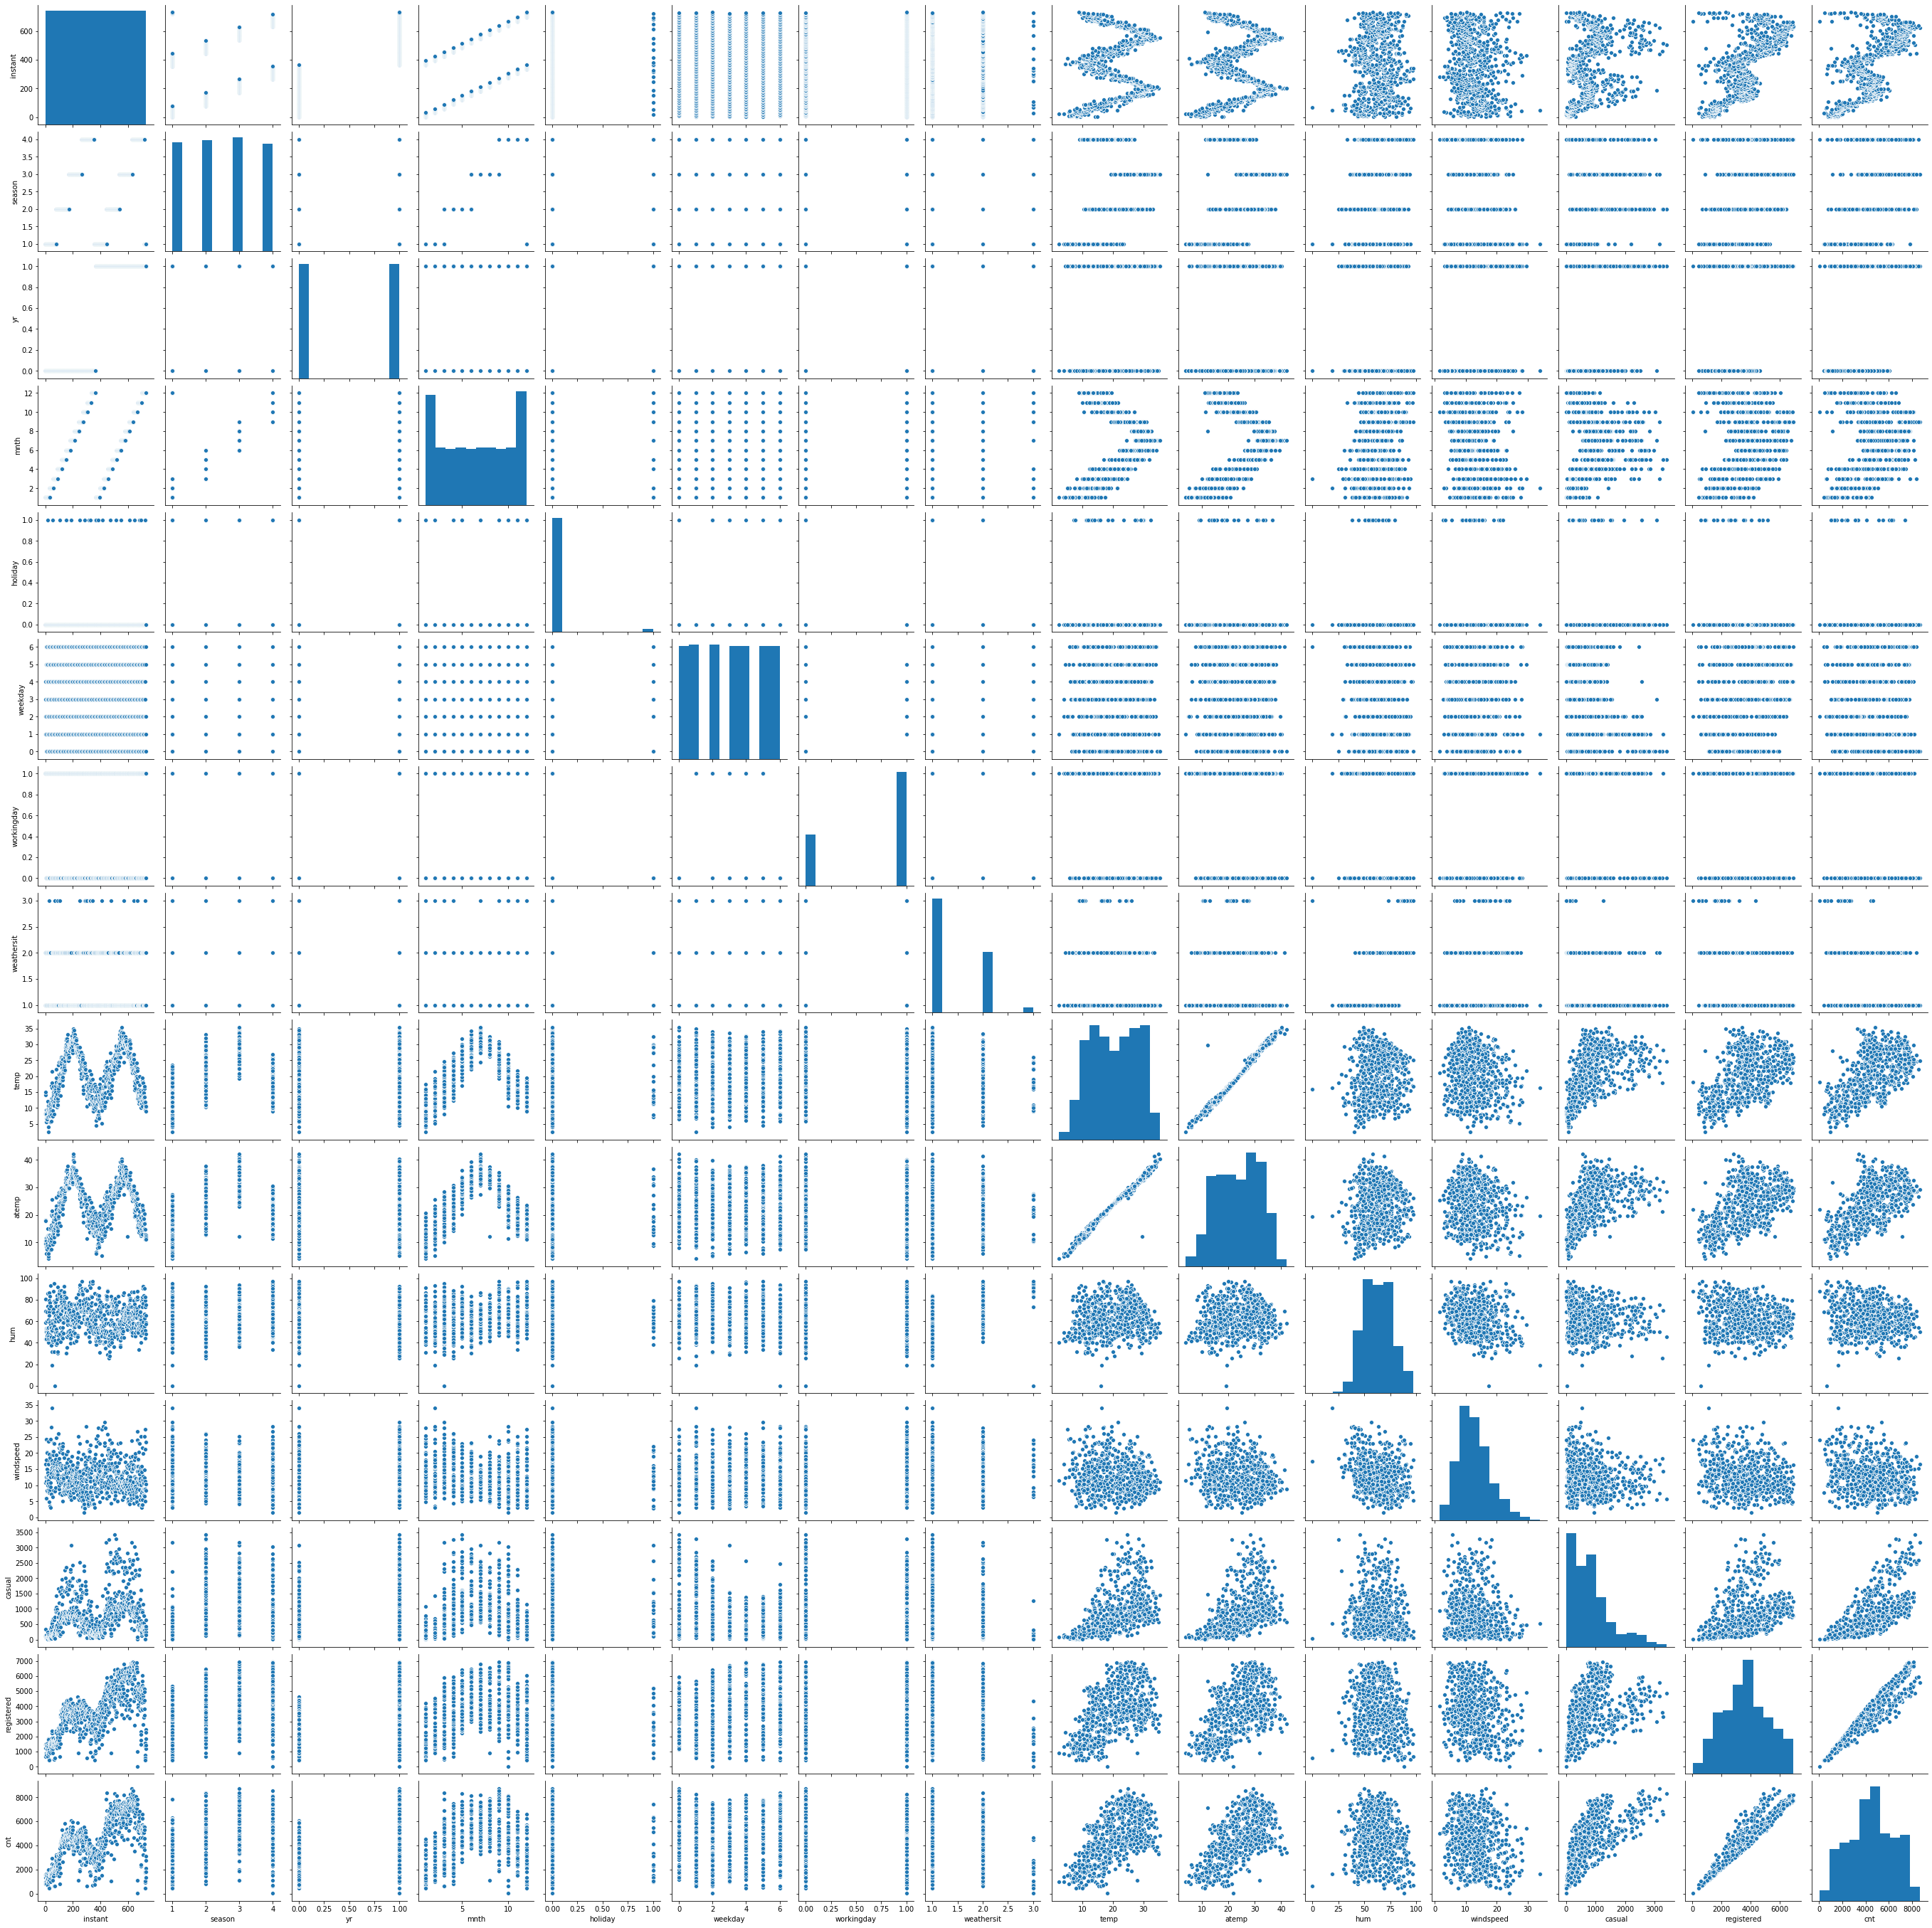

In [11]:
#ploting the pairplot to see the correlation among all the variables
sns.pairplot(boombikes)
plt.show()

In [12]:
boombikes.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.001182,-0.015171,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.001182,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,-0.350848,0.199326,0.036183
workingday,-0.015171,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


### Dropping columns unneccesary columns which are irrelevant , redundant for the analysis or are similar to the target variable 

In [13]:
#'instant' - dropping this as its irrelevant for the modelling
#'dteday' - dropping this as its redundant and information can be obtained from yr, mnth column
#'casual','registered' - dropping this as it is part of a target variable cnt


boombikes = boombikes.drop(['instant','dteday','casual','registered'],axis = 1)

In [14]:
#checking the columns after dropping few features
boombikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

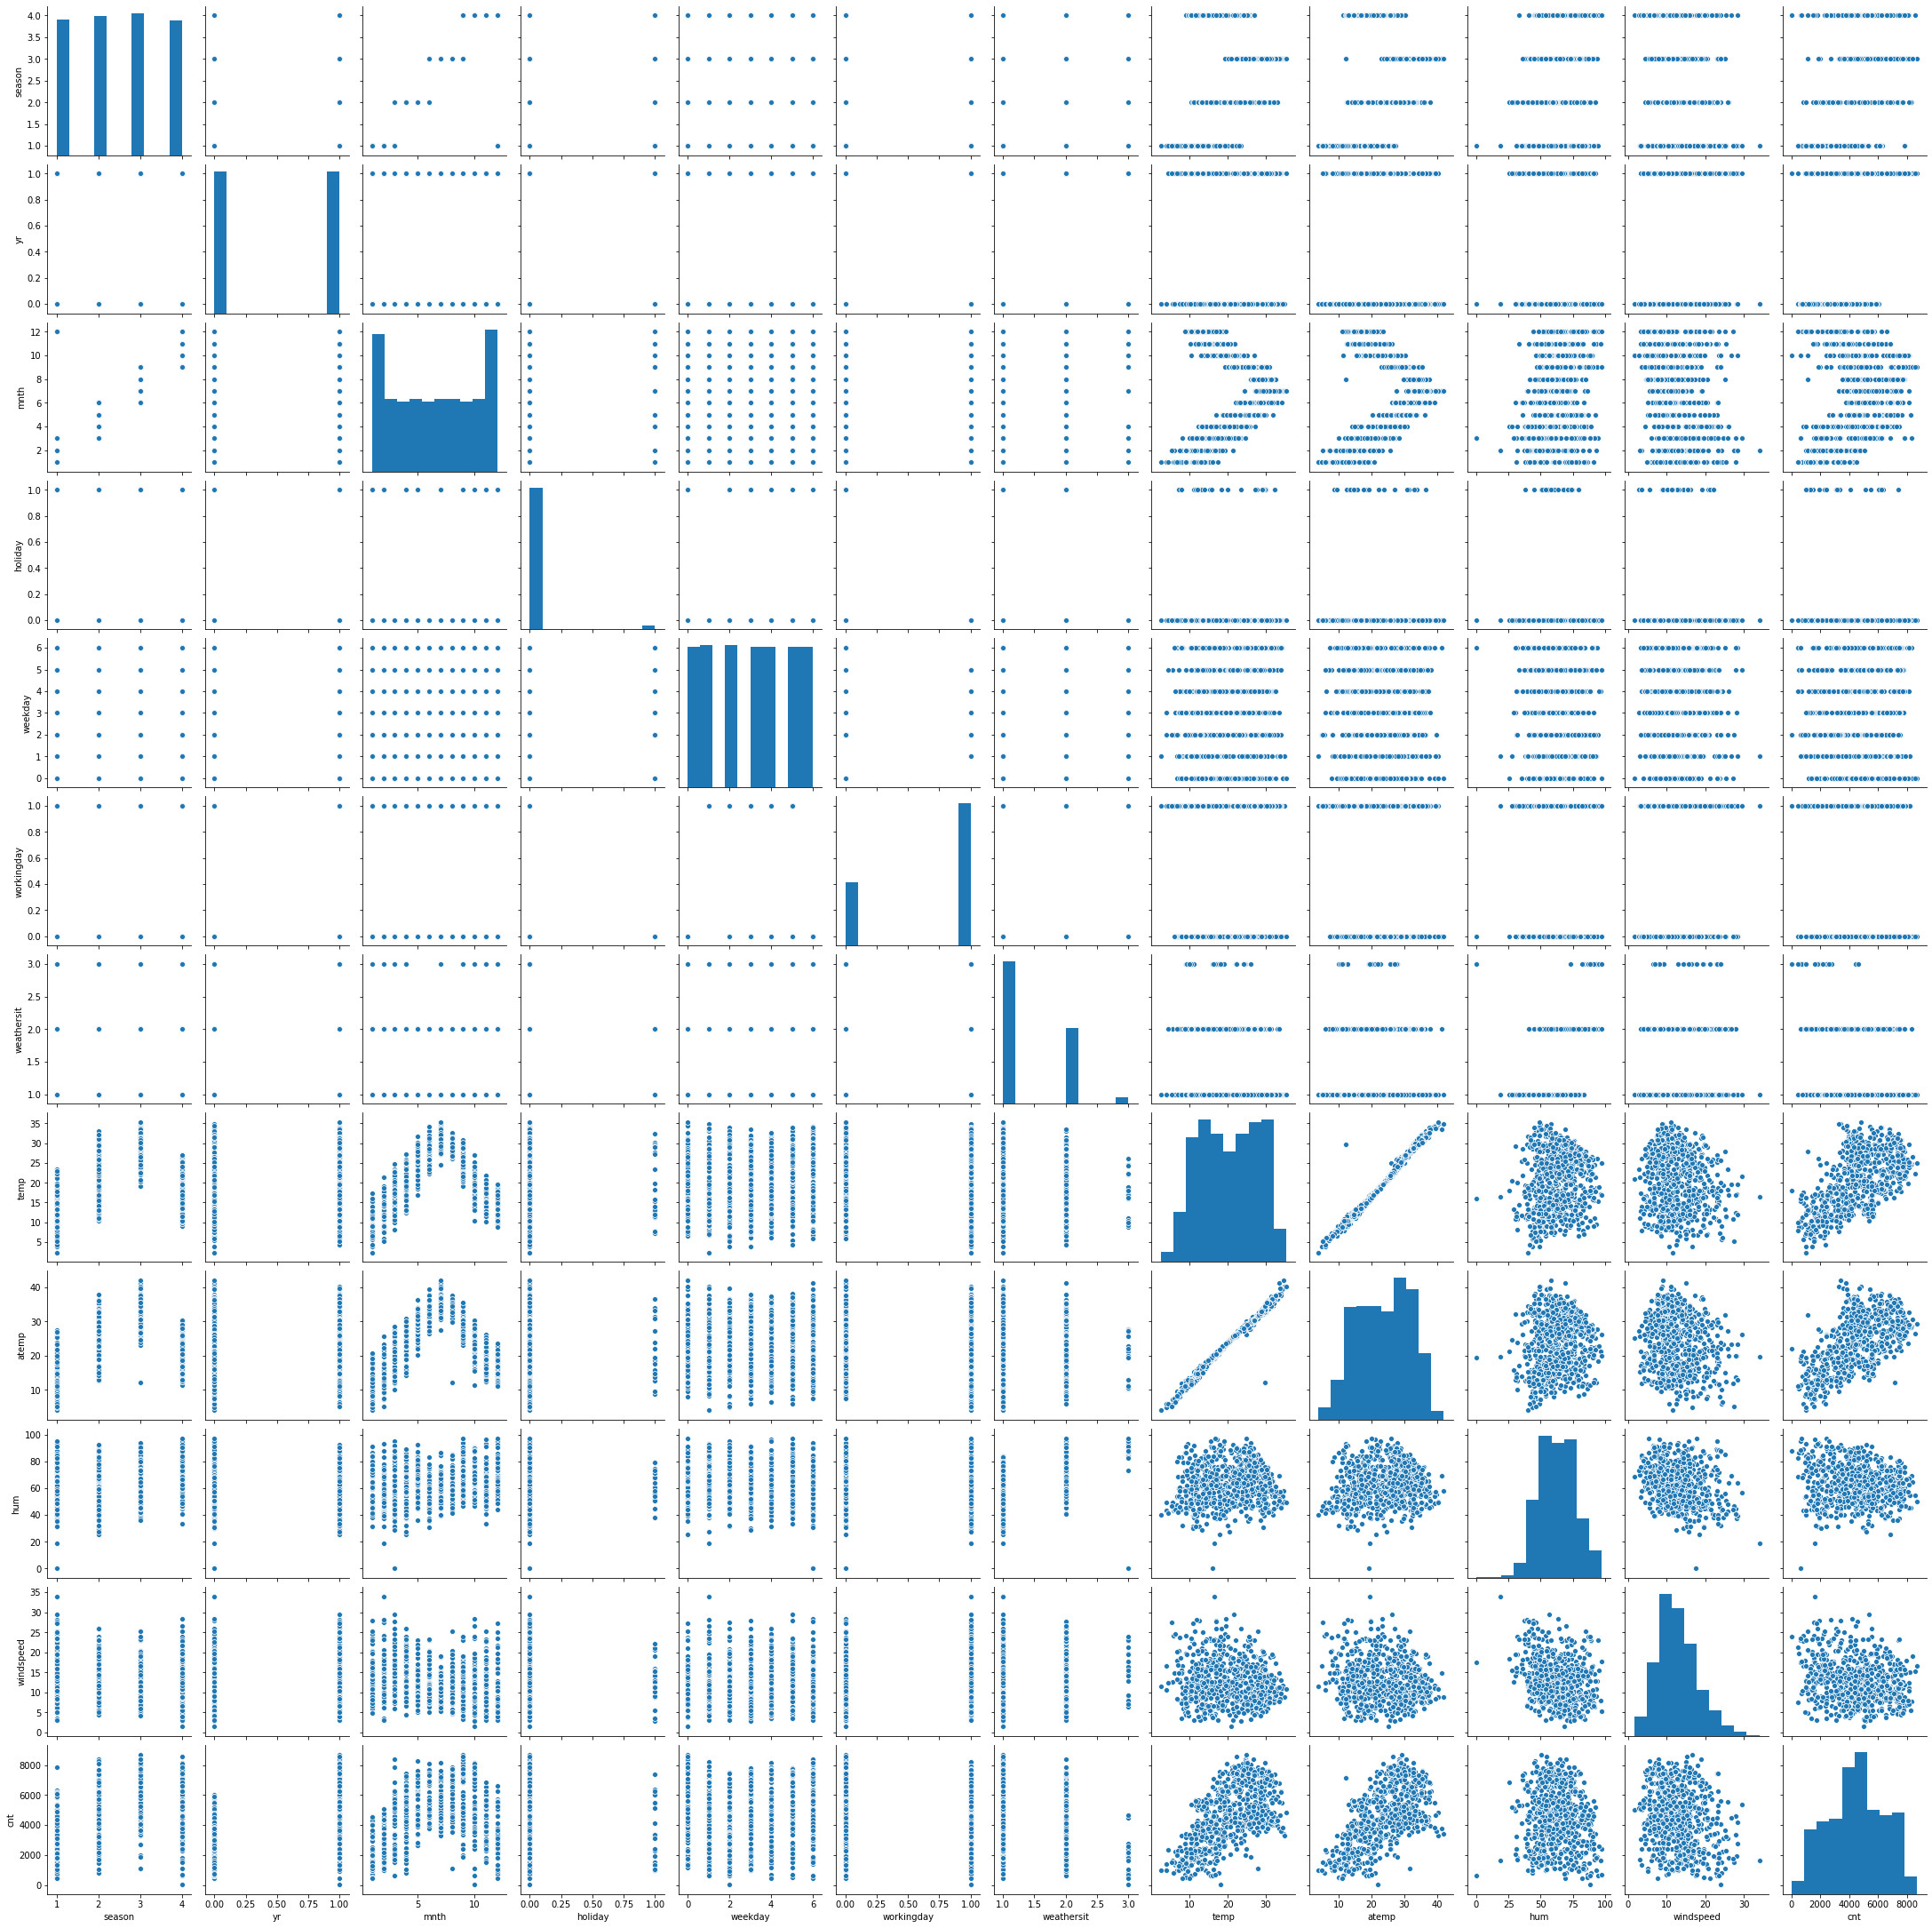

In [15]:
#ploting a pairplot

sns.pairplot(boombikes)
plt.show()

In [16]:
#checking correlation

boombikes.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


#### As temp and atemp is highly correlated, so dropping one of them to avoid the multicollinearity in data

In [17]:
boombikes = boombikes.drop(['atemp'],axis = 1)

In [18]:
boombikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [19]:
# Checking the value counts for object data type.
l = [col for col in boombikes.columns if isinstance(col,str)]
for i in l:
    print(boombikes[i].value_counts(), end = '\n\n')
    print('*'*50,end ='\n\n')

3    188
2    184
1    180
4    178
Name: season, dtype: int64

**************************************************

1    365
0    365
Name: yr, dtype: int64

**************************************************

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

**************************************************

0    709
1     21
Name: holiday, dtype: int64

**************************************************

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

**************************************************

1    504
0    226
Name: workingday, dtype: int64

**************************************************

1    463
2    246
3     21
Name: weathersit, dtype: int64

**************************************************

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    

In [20]:
#Columns which are having lesser number of unique values can be considered as categorical columns .

boombikes.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
cnt           695
dtype: int64

##### Categorical columns needed to be converted to object data type
<pre>
Column name                   dtype     count <br>
***********                   *****     *****
yr	                        int64	  2 <br>
holiday                 	  int64	  2 <br>
workingday      	          int64	  2<br>
weathersit      	          int64	  3<br>
season                        int64	  4<br>
weekday         	          int64      7<br>
mnth           	           int64	  12<br>
</pre>

In [21]:
#cnverting the categorical columns to object data type

boombikes.workingday = boombikes.workingday.astype('str')
boombikes.weathersit = boombikes.weathersit.astype('str')
boombikes.season = boombikes.season.astype('str')
boombikes.weekday = boombikes.weekday.astype('str')
boombikes.mnth = boombikes.mnth.astype('str')

### Understanding data dictionary and manipulating the column values

In [22]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 62.9+ KB


In [23]:
boombikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [24]:
#Mapping season to the corresponding values given in dictionary
#(1:spring, 2:summer, 3:fall, 4:winter)
boombikes.season = boombikes.season.map({'1':'spring','2':'summer','3':'fall','4':'winter'})

In [25]:
boombikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [26]:
boombikes.mnth.value_counts()

5     62
7     62
8     62
3     62
1     62
12    62
10    62
9     60
6     60
4     60
11    60
2     56
Name: mnth, dtype: int64

In [27]:
#Mapping months to the corresponding values given in dictionary
#month ( 1 to 12)
boombikes.mnth = boombikes.mnth.map({'1':'jan','2':'feb','3':'march','4':'april','5':'may','6':'jun','7':'july','8':'aug','9':'sept','10':'oct','11':'nov','12':'dec'})


In [28]:
boombikes.mnth.value_counts()

dec      62
oct      62
aug      62
march    62
jan      62
may      62
july     62
april    60
nov      60
sept     60
jun      60
feb      56
Name: mnth, dtype: int64

In [29]:
#Mapping weekday to the corresponding values given in dictionary
#weekday : day of the week

boombikes.weekday = boombikes.weekday.map({'0':'sun','1':'mon','2':'tue','3':'wed','4':'thurs','5':'fri','6':'sat'})


In [30]:
boombikes.weekday.value_counts()

tue      105
mon      105
sat      104
wed      104
fri      104
thurs    104
sun      104
Name: weekday, dtype: int64

In [31]:
#Mapping weathersit to the corresponding values given in dictionary
#weathersit : 
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

boombikes.weathersit = boombikes.weathersit.map({'1':'clear','2':'mist','3':'light snow','4':'heavy rain'})

In [32]:
boombikes.weathersit.value_counts()

clear         463
mist          246
light snow     21
Name: weathersit, dtype: int64

### Data Visualisation
Checking outliers for different numeric columns

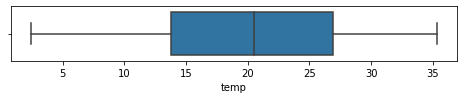

In [33]:
# Finding the presence of outliers in various columns
plt.figure(figsize=[8,1])
sns.boxplot(boombikes.temp)
plt.show()

No outliers found in the temperature feature

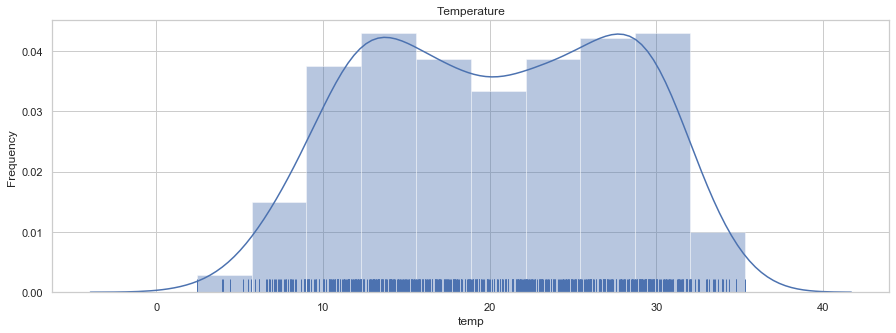

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.title("Temperature")
plt.ylabel("Frequency")
sns.distplot(boombikes.temp, bins=10, rug=True)

We can see in the plot that temperature is bimodal and having two clusters may be summer and winter.

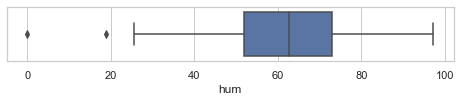

In [35]:
plt.figure(figsize=[8,1])
sns.boxplot(boombikes.hum)
plt.show()

Outliers found which are having values around ero and 20

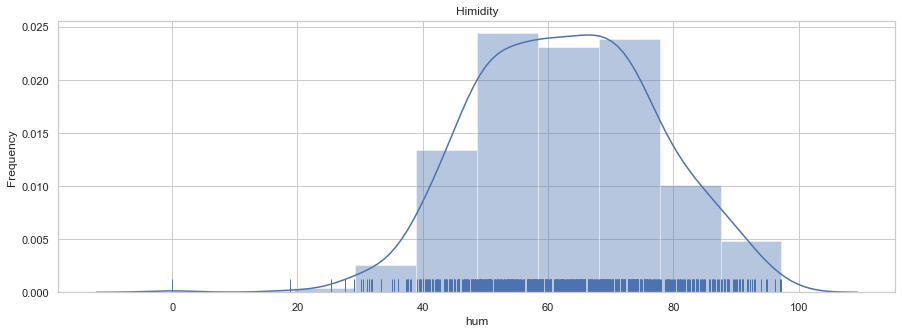

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.title("Himidity")
plt.ylabel("Frequency")
sns.distplot(boombikes.hum, bins=10, rug=True)

We can see in the boxplot and distplot above, most of the values for humidity lie between approax 25 and 98. The rest of them are outliers which lies between 0 and 20 so the dta is left skewed, Various transformations can be performed to overcome this.

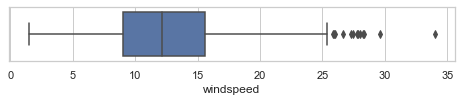

In [37]:
plt.figure(figsize=[8,1])
sns.boxplot(boombikes.windspeed)
plt.show()

We can see in the boxplot above, most of the values for windspeed lie between approax 2 and 26. The rest of them are outliers which lies after 25.

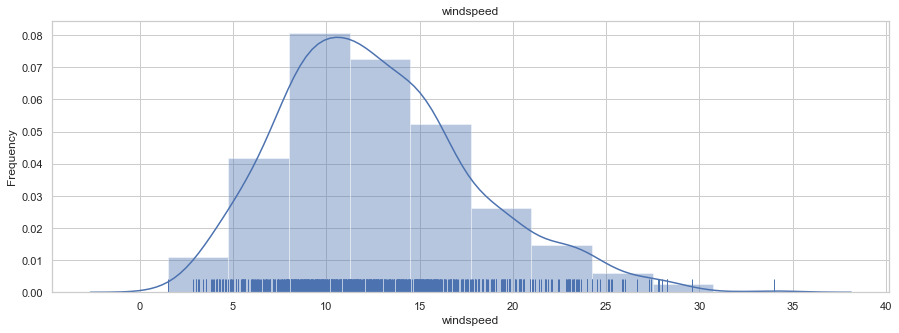

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.title("windspeed")
plt.ylabel("Frequency")
sns.distplot(boombikes.windspeed, bins=10, rug=True)

We can see in the above distplot that it is left skewed and we can use log/power transformations to improve our model accuracy

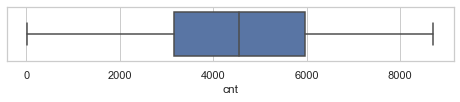

In [39]:
plt.figure(figsize=[8,1])
sns.boxplot(boombikes.cnt)
plt.show()

No outliers found

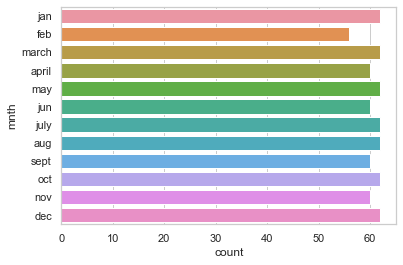

In [40]:
# Plotting the count of Month against the various values present. 

sns.countplot(y = boombikes.mnth, data = boombikes)
plt.show()

Higher values are for Jan, Dec, March, May, July, August and Oct

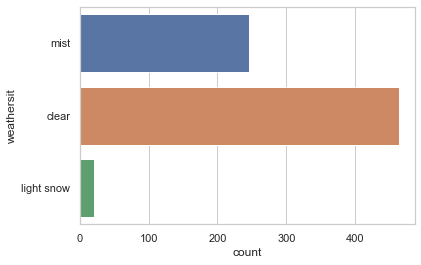

In [41]:
# Plotting the count of weathersit against the various values present.

sns.countplot(y = boombikes.weathersit, data = boombikes)
plt.show()

Hishest count is for clear weather

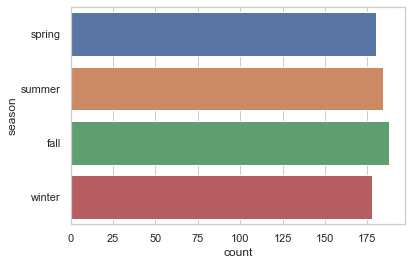

In [42]:
# Plotting the count of season against the various values present.

sns.countplot(y = boombikes.season, data = boombikes)
plt.show()

Highest count is on fall season while lowest is on winter

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

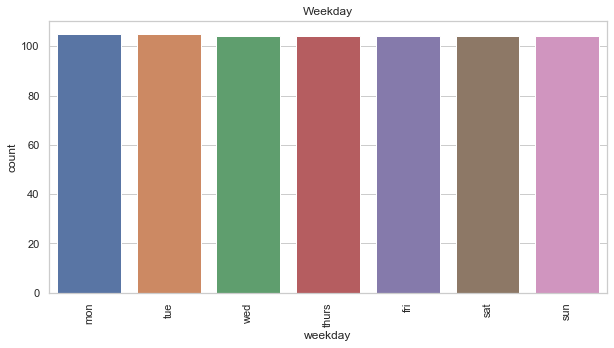

In [43]:
# Plotting the count of weekday against the various values present.



sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
plt.title("Weekday")
chart2 = sns.countplot(x= boombikes.weekday, data=boombikes)
plt.xticks(rotation=90)

All the weekday has almost similar count

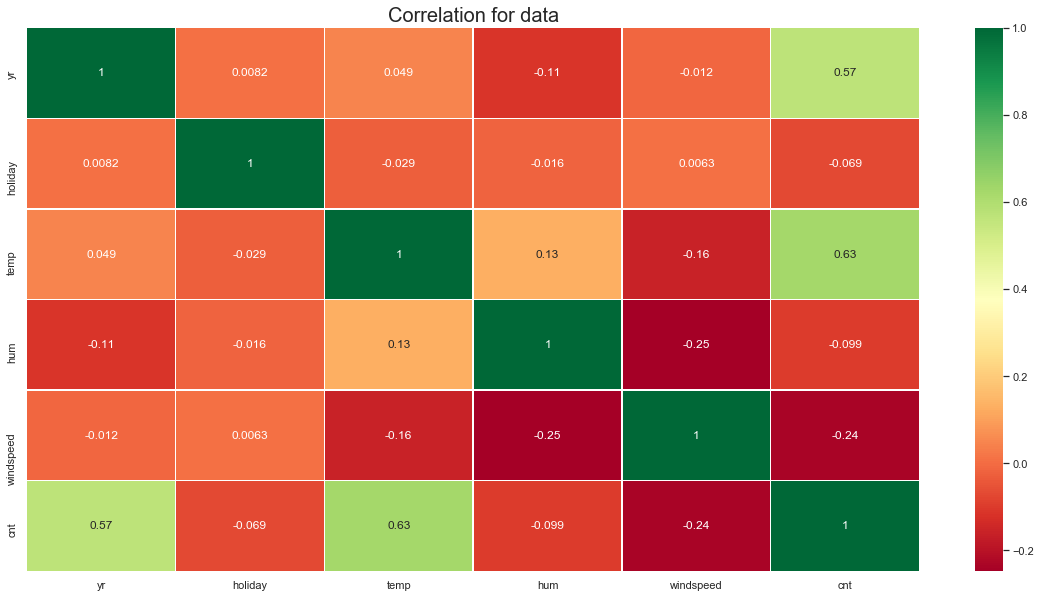

In [44]:
plt.figure(figsize = (20,10))

ax = plt.axes()
sns.heatmap(boombikes.corr(),annot = True, linewidth = 0.5,cmap = "RdYlGn")
ax.set_title("Correlation for data", fontsize =20)
plt.show()

### The heatmap shows some useful insights:

#### Correlation of target variable with independent variable


- There is a negative correlation between windspeed and the cnt. More the windspeed is lesser the demand is.

- There is a positive correlation between temp and the cnt. More the temperature is higher the demand is.

#### Correlation among independent variable

- Similar trend of negative correlation is seen between windspeed and humidity i.e. its less humid on a windy day as they are negatively correlated.

In [45]:
boombikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

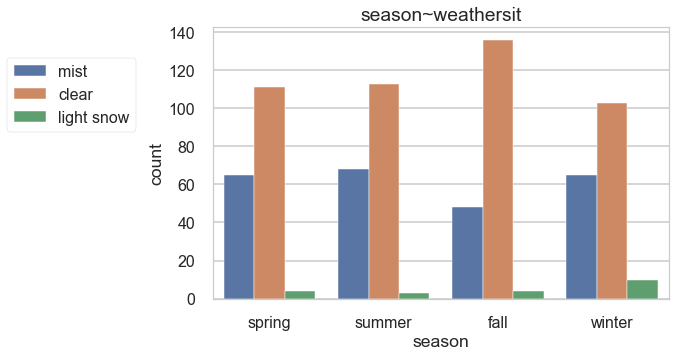

In [46]:
plt.style.use("seaborn-poster")
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("season~weathersit")
chart1 = sns.countplot(x = boombikes.season ,hue = boombikes.weathersit, data=boombikes)
chart1.legend(loc='right', bbox_to_anchor=(-0.15, 0.75), ncol=1)

Clear weather has the highest count across all seasons and light snow weather has the lowest count across all seasons

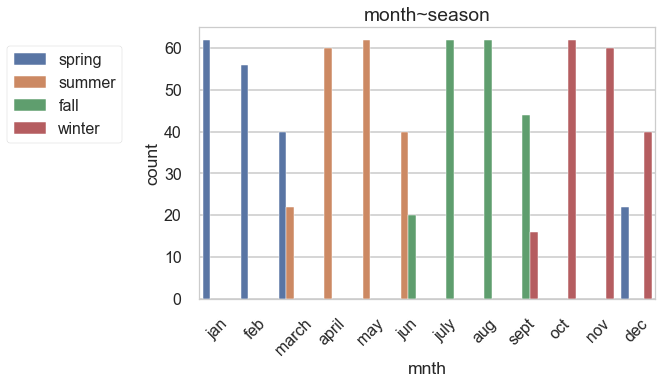

In [47]:
plt.style.use("seaborn-poster")
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("month~season")
chart1 = sns.countplot(x = boombikes.mnth ,hue = boombikes.season, data=boombikes)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart1.legend(loc='right', bbox_to_anchor=(-0.15, 0.75), ncol=1)

Text(0.5, 0, 'Holiday')

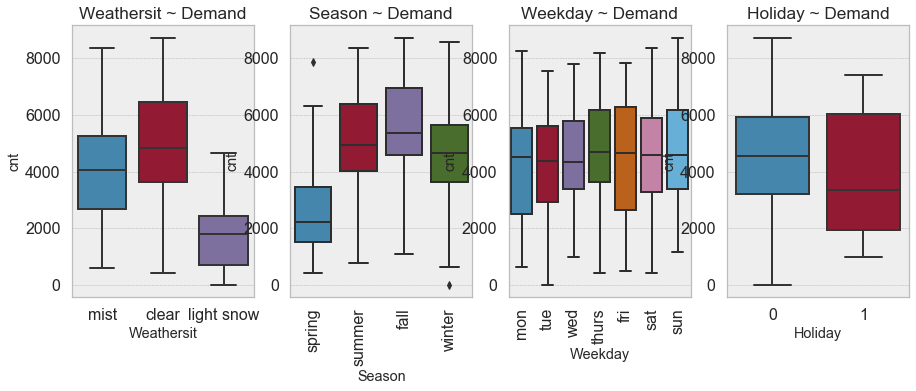

In [48]:
plt.style.use("bmh")
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.title("Weathersit ~ Demand")
sns.boxplot(y = boombikes.cnt   ,x = boombikes.weathersit, data = boombikes)
plt.xlabel("Weathersit")



plt.subplot(1,4,2)
plt.title("Season ~ Demand")
sns.boxplot(y = boombikes.cnt   ,x = boombikes.season, data = boombikes)
plt.xlabel("Season")
plt.xticks(rotation=90)


plt.subplot(1,4,3)
plt.title("Weekday ~ Demand")
sns.boxplot(y = boombikes.cnt   ,x = boombikes.weekday, data = boombikes)
plt.xlabel("Weekday")
plt.xticks(rotation=90)
  
    

plt.subplot(1,4,4)
plt.title("Holiday ~ Demand")
sns.boxplot(y = boombikes.cnt   ,x = boombikes.holiday, data = boombikes)
plt.xlabel("Holiday")
  

- In clear weather the demand is highest and in snow its lowest
- The demand is highest in fall season and also the demand is more on non holiday days

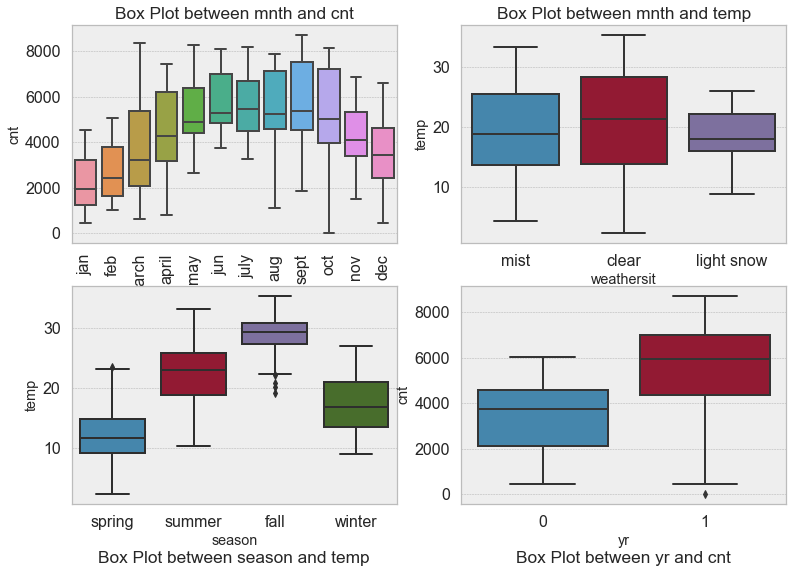

In [49]:
# Box plot between mnth and cnt

plt.subplot(2,2,1)
plt.title('Box Plot between mnth and cnt')
sns.boxplot(x=boombikes.mnth, y=boombikes.cnt, data=boombikes)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Box Plot between mnth and temp')
sns.boxplot(x=boombikes.weathersit, y=boombikes.temp, data=boombikes)



plt.subplot(2,2,3)
plt.title('Box Plot between season and temp',y=-0.3)
sns.boxplot(x=boombikes.season, y=boombikes.temp, data=boombikes)


plt.subplot(2,2,4)
plt.title('Box Plot between yr and cnt',y=-0.3)
sns.boxplot(x=boombikes.yr, y=boombikes.cnt, data=boombikes)
plt.show()



 - The demand is more in the middle of the year
 - The demand has significantly increased in year 2019 as compared to 2019

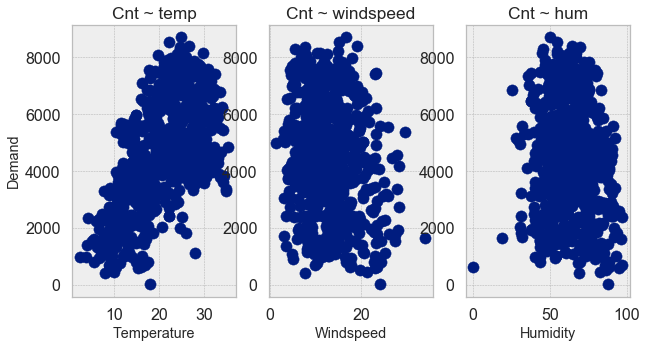

In [50]:
# Plotting CNT against temp


plt.style.use("seaborn-dark-palette")
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Cnt ~ temp")
plt.scatter(boombikes.temp ,boombikes.cnt)
plt.xlabel("Temperature")
plt.ylabel("Demand")


plt.subplot(1,3,2)
plt.title("Cnt ~ windspeed")
plt.scatter(boombikes.windspeed,boombikes.cnt )
plt.xlabel("Windspeed")

plt.subplot(1,3,3)
plt.title("Cnt ~ hum")
plt.scatter(boombikes.hum,boombikes.cnt )
plt.xlabel("Humidity")
plt.show()

- Demand is positively related to temepature while demand is negatively related with windspeed and humidity


## Data Preparation
#### Dummifying the nominal categorical columns which are not binary and dropping the first column of the dummy variable to avoid the dummy variable trap

In [51]:
boombikes = pd.get_dummies(boombikes, columns =['weekday','weathersit','season','mnth'],drop_first = 'True')
boombikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_mon,weekday_sat,weekday_sun,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
boombikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thurs',
       'weekday_tue', 'weekday_wed', 'weathersit_light snow',
       'weathersit_mist', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_jun',
       'mnth_march', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept'],
      dtype='object')

## Model Building and Evaluation

In [53]:
#importing required libraries

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Dividing the data into test and train

In [54]:
boombikes_train, boombikes_test = train_test_split(boombikes,train_size = 0.7,random_state=100)

In [55]:
boombikes_train.shape

(510, 29)

In [56]:
boombikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_mon,weekday_sat,weekday_sun,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,13.803347,72.9583,14.707907,1683,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
boombikes_test.shape

(220, 29)

### Scaling
After splitting the data into train and test in 70:30 ratio, we scale the numeric variables of train dataset for better interpretability and faster convergence of gradient descent

In [58]:
boombikes_train.describe()

,yr,holiday,temp,hum,windspeed,cnt,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,20.108257,63.123710,12.834912,4485.337255,0.154902,0.129412,0.137255,0.143137,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,7.431626,14.153170,5.292031,1950.666077,0.362166,0.335985,0.344454,0.350557,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,20.277923,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
scaler = MinMaxScaler()
numerical_variable = ['temp','hum','windspeed','cnt']

In [60]:
boombikes_train[numerical_variable] = scaler.fit_transform(boombikes_train[numerical_variable])

In [61]:
boombikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_mon,weekday_sat,weekday_sun,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
boombikes_train.describe()

,yr,holiday,temp,hum,windspeed,cnt,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537440,0.650480,0.320883,0.513499,0.154902,0.129412,0.137255,0.143137,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.225858,0.145846,0.169803,0.224421,0.362166,0.335985,0.344454,0.350557,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Modelling and Evaluation

In [63]:
y_boombikes_train = boombikes_train.pop('cnt')
y_boombikes_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [64]:
X_boombikes_train = boombikes_train
X_boombikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.751824,0.380981,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y_boombikes_train.dtype

dtype('float64')

### Model building using RFE

As we have 28 columns in total, we can build model using RFE to select features.We can start ith 15 columns and the drop column one by one by inspecting the adjusted R-squared, R-squared, P-value and VIF. We will be using SKlearn for the the modelling after RFE

In [66]:
#Building the 1st model with RFE(Recursive Feature Elimination)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [67]:
# 15 variables to be selected using RFE

lm = LinearRegression()
lm.fit(X_boombikes_train, y_boombikes_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_boombikes_train, y_boombikes_train)

In [68]:
#columns which got selected

list(zip(X_boombikes_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thurs', False, 13),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 10),
 ('weathersit_light snow', True, 1),
 ('weathersit_mist', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_march', False, 14),
 ('mnth_may', False, 8),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1)]

In [69]:
#Columns where RFE support is True

RFE_col = X_boombikes_train.columns[rfe.support_]
print(RFE_col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weathersit_light snow',
       'weathersit_mist', 'season_spring', 'season_summer', 'season_winter',
       'mnth_dec', 'mnth_jan', 'mnth_july', 'mnth_nov', 'mnth_sept'],
      dtype='object')


In [70]:
#Columns where RFE support is False

not_RFE_col = X_boombikes_train.columns[~rfe.support_]
print(not_RFE_col)

Index(['workingday', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thurs', 'weekday_tue', 'weekday_wed', 'mnth_aug', 'mnth_feb',
       'mnth_jun', 'mnth_march', 'mnth_may', 'mnth_oct'],
      dtype='object')


In [71]:
# lets now check the summary of the model using statsmodels

import statsmodels.api as sm

In [72]:
#subset the feature selected by RFE
X_boombikes_train_RFE = X_boombikes_train[RFE_col]
X_boombikes_train_RFE.head()

,yr,holiday,temp,hum,windspeed,weathersit_light snow,weathersit_mist,season_spring,season_summer,season_winter,mnth_dec,mnth_jan,mnth_july,mnth_nov,mnth_sept
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0,1,1,0,0,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,1,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,1,0,0,0,0,0,0


In [73]:
#adding constant to the model
X_boombikes_train_RFE = sm.add_constant(X_boombikes_train_RFE)
X_boombikes_train_RFE.head()

## Running the linear model 
lm = sm.OLS(y_boombikes_train.astype(float),X_boombikes_train_RFE.astype(float)).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          8.15e-189
Time:                        01:32:09   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

### Lets check for multicollinearity among these variables

Checking VIF
Variance Inflation Factor or VIF, helps us in detecting associations among predictors and gives a basic quantitative idea about how well one independent variable is explained by all the other independent variables combined.The formula for calculating VIF is:

VIF=1/(1−R2) ¶

In [74]:
# Calculate the VIFs for the 1st model

from statsmodels.stats.outliers_influence import variance_inflation_factor


# calculating VIF
X_boombikes_train_RFE = X_boombikes_train_RFE.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_boombikes_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_boombikes_train_RFE.values, i) for i in range(X_boombikes_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
7,season_spring,4.37
9,season_winter,4.06
8,season_summer,2.82
6,weathersit_mist,2.32
0,yr,2.09
13,mnth_nov,1.85
11,mnth_jan,1.75


### humidity has high VIF suggeting high multi-collinearity and can be dropped

## 2nd model

In [75]:
#Drop mnth_dec
X_boombikes_train_RFE = X_boombikes_train_RFE.drop(["hum"], axis = 1)
X_boombikes_train_RFE.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_light snow',
       'weathersit_mist', 'season_spring', 'season_summer', 'season_winter',
       'mnth_dec', 'mnth_jan', 'mnth_july', 'mnth_nov', 'mnth_sept'],
      dtype='object')

In [76]:
#Rebuliding the second model without mnth_dec


X_boombikes_train_RFE = sm.add_constant(X_boombikes_train_RFE)
lm = sm.OLS(y_boombikes_train,X_boombikes_train_RFE).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          4.75e-186
Time:                        01:32:10   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [77]:
# Re - calculating VIF for 2nd model
X_boombikes_train_RFE = X_boombikes_train_RFE.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_boombikes_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_boombikes_train_RFE.values, i) for i in range(X_boombikes_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
8,season_winter,2.95
6,season_spring,2.89
7,season_summer,2.24
0,yr,2.07
12,mnth_nov,1.81
10,mnth_jan,1.66
11,mnth_july,1.59
5,weathersit_mist,1.57


#### mnth_nov could be dropped

## 3rd model

In [78]:
#Drop mnth_nov
X_boombikes_train_RFE = X_boombikes_train_RFE.drop(["mnth_nov"], axis = 1)
X_boombikes_train_RFE.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_light snow',
       'weathersit_mist', 'season_spring', 'season_summer', 'season_winter',
       'mnth_dec', 'mnth_jan', 'mnth_july', 'mnth_sept'],
      dtype='object')

### mnth_nov is insignificant in presence of other variables due to high p-value and low VIF and can be dropped

In [79]:
#Rebuliding the model without mnth_nov - 3rd model


X_boombikes_train_RFE = sm.add_constant(X_boombikes_train_RFE)
lm = sm.OLS(y_boombikes_train,X_boombikes_train_RFE).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          2.74e-186
Time:                        01:32:10   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [80]:
# Re - calculating VIF for 3rd model 
X_boombikes_train_RFE = X_boombikes_train_RFE.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_boombikes_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_boombikes_train_RFE.values, i) for i in range(X_boombikes_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
6,season_spring,2.89
7,season_summer,2.24
0,yr,2.07
8,season_winter,2.05
10,mnth_jan,1.65
11,mnth_july,1.59
5,weathersit_mist,1.57
12,mnth_sept,1.34


## 4th model

### mnth_dec is insignificant in presence of other variables and can be dropped

In [81]:
#Drop mnth_jan
X_boombikes_train_RFE = X_boombikes_train_RFE.drop(["mnth_dec"], axis = 1)
X_boombikes_train_RFE.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_light snow',
       'weathersit_mist', 'season_spring', 'season_summer', 'season_winter',
       'mnth_jan', 'mnth_july', 'mnth_sept'],
      dtype='object')

In [82]:
#Rebuliding the model without mnth_jan - 4th model


X_boombikes_train_RFE = sm.add_constant(X_boombikes_train_RFE)
lm = sm.OLS(y_boombikes_train,X_boombikes_train_RFE).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          8.14e-187
Time:                        01:32:10   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [83]:
# Re - calculating VIF for 4th model 
X_boombikes_train_RFE = X_boombikes_train_RFE.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_boombikes_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_boombikes_train_RFE.values, i) for i in range(X_boombikes_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
6,season_spring,2.75
7,season_summer,2.24
0,yr,2.07
8,season_winter,1.78
9,mnth_jan,1.61
10,mnth_july,1.59
5,weathersit_mist,1.56
11,mnth_sept,1.34


## 5th model

### mnth_jan is insignificant in presence of other variables and can be dropped

In [84]:
#Drop season_spring
X_boombikes_train_RFE = X_boombikes_train_RFE.drop(["mnth_jan"], axis = 1)
X_boombikes_train_RFE.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_light snow',
       'weathersit_mist', 'season_spring', 'season_summer', 'season_winter',
       'mnth_july', 'mnth_sept'],
      dtype='object')

In [85]:
#Rebuliding the model without season_spring - 5th model


X_boombikes_train_RFE = sm.add_constant(X_boombikes_train_RFE)
lm = sm.OLS(y_boombikes_train,X_boombikes_train_RFE).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          5.06e-187
Time:                        01:32:11   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [86]:
# Re - calculating VIF for 5th model 
X_boombikes_train_RFE = X_boombikes_train_RFE.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_boombikes_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_boombikes_train_RFE.values, i) for i in range(X_boombikes_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
7,season_summer,2.23
6,season_spring,2.08
0,yr,2.07
8,season_winter,1.78
9,mnth_july,1.58
5,weathersit_mist,1.55
10,mnth_sept,1.34
4,weathersit_light snow,1.08


## 6th model

### mnth_july is insignificant in presence of other variables and can be dropped

In [87]:
#Drop mnth_july
X_boombikes_train_RFE = X_boombikes_train_RFE.drop(["mnth_july"], axis = 1)
X_boombikes_train_RFE.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_light snow',
       'weathersit_mist', 'season_spring', 'season_summer', 'season_winter',
       'mnth_sept'],
      dtype='object')

In [88]:
#Rebuliding the model without mnth_july - 6th model


X_boombikes_train_RFE = sm.add_constant(X_boombikes_train_RFE)
lm = sm.OLS(y_boombikes_train,X_boombikes_train_RFE).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          1.47e-186
Time:                        01:32:11   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [89]:
# Re - calculating VIF for 6th model 
X_boombikes_train_RFE = X_boombikes_train_RFE.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_boombikes_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_boombikes_train_RFE.values, i) for i in range(X_boombikes_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
6,season_spring,1.99
7,season_summer,1.90
8,season_winter,1.63
5,weathersit_mist,1.55
9,mnth_sept,1.23
4,weathersit_light snow,1.08
1,holiday,1.04


## Verifying the assumptions of Linear Regression

### Multicollinearity
 
WE could see above that VIF of almost all the feature are below 5 which states that there is no or very less collinearity between the features. So the assumption of no multicollinearity holds true 
in our model

### Residual Analysis
One of the major assumptions of linear regression is the error terms are  normally distributed. We need to plot the histogram of the error terms and verify this.

In [90]:
X_boombikes_train_RFE

,yr,holiday,temp,windspeed,weathersit_light snow,weathersit_mist,season_spring,season_summer,season_winter,mnth_sept
576,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,1,1,0,0,0
728,1,0,0.245101,0.663106,0,0,1,0,0,0
482,1,0,0.395666,0.188475,0,1,0,1,0,0
111,0,0,0.345824,0.380981,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.187140,0,0,0,0,0,0
53,0,0,0.202618,0.111379,0,0,1,0,0,0
350,0,0,0.248216,0.431816,0,1,0,0,1,0
79,0,0,0.462664,0.529881,0,1,0,1,0,0


In [91]:
X_boombikes_train_RFE= sm.add_constant(X_boombikes_train_RFE)
y_boombikes_train_pred = lm.predict(X_boombikes_train_RFE)
y_boombikes_train_pred

576    0.775223
426    0.464371
728    0.388469
482    0.569433
111    0.282980
         ...   
578    0.810023
53     0.215752
350    0.261221
79     0.316747
520    0.641815
Length: 510, dtype: float64

In [92]:
residual = y_boombikes_train - y_boombikes_train_pred

<Figure size 921.6x633.6 with 0 Axes>

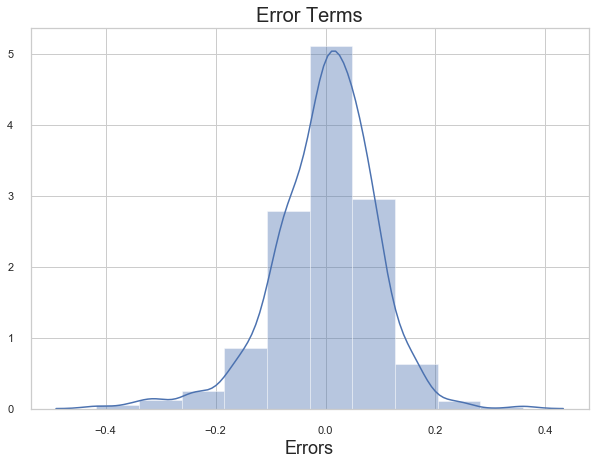

In [93]:
# Ploting the histogram

sns.set(style="whitegrid")
fig = plt.figure()
plt.figure(figsize=(10,7))
sns.distplot(residual, bins = 10)
plt.title('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)  
plt.show()

As the error terms is almost normally distributed and centered at zero with a bit of skewness, we could say that normality of residuals assumption holds good.

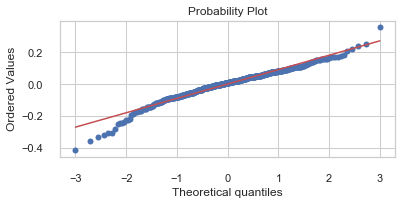

In [94]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

If we plot a qq plot we can clearly see that most of the observed values and theoritical values falls on the same line almost. So, We can conclude that the overall distribution is near normal

### Homoscedasticity/Constant Variance

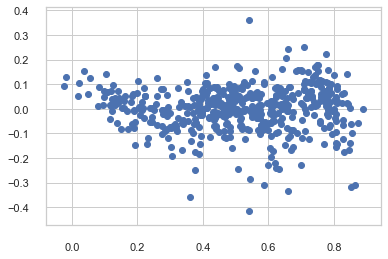

In [95]:
fig, ax = plt.subplots(figsize=(6,4))
_ = ax.scatter(y_boombikes_train_pred, residual)

After plotting the predictions on the x axis and the overall residual on the y axis we clearly visualize that the overall distribution is randomly sampled and there is no pattern whatsoever based on residuals and the prediction. And most of the values are centred around zero

### No autocorrelation of residuals

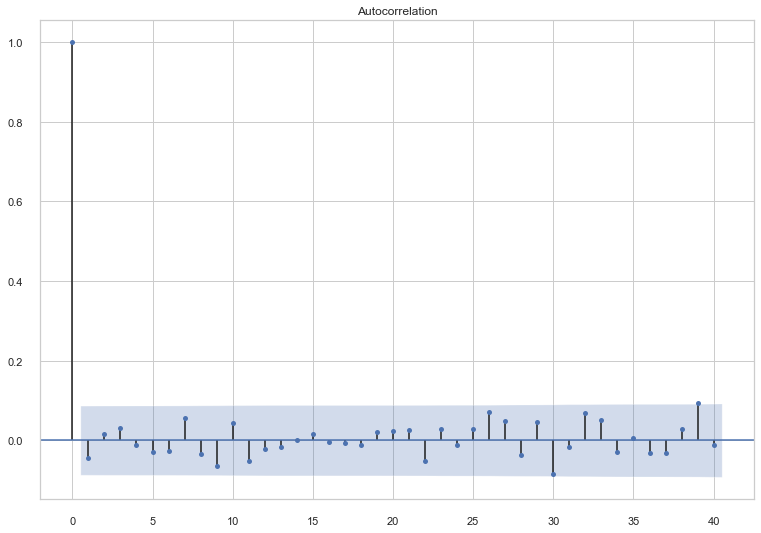

In [96]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

After plotting the auto correlation function, we could see that the residual with itself will have a heavy correlation. Most of the autocorrelation values do not cross the threshold of being significant i.e the blue border.

### Applying scaling on test data

In [97]:
boombikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_mon,weekday_sat,weekday_sun,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,1,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [98]:
boombikes_test.describe()

,yr,holiday,temp,hum,windspeed,cnt,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,20.808400,61.934025,12.598352,4560.559091,0.118182,0.172727,0.154545,0.140909,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,7.672796,14.429542,4.973534,1904.968544,0.323559,0.378873,0.362295,0.348721,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,3.957390,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.119375,51.354200,9.031466,3312.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,20.790424,60.708350,12.188004,4582.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,27.299153,72.179375,15.385361,5913.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,34.815847,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
scaler = MinMaxScaler()
boombikes_test[numerical_variable] = scaler.fit_transform(boombikes_test[numerical_variable])
#Finding the numerical columns so that it can be scaled 
numerical_variable = ['temp','hum','windspeed','cnt']
boombikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_mon,weekday_sat,weekday_sun,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept
184,0,1,0,0.837241,0.534223,0.149393,0.704300,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.911423,0.470417,0.231142,0.725421,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.496221,0.777843,0.443398,0.278853,0,1,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.890387,0.236659,0.449707,0.545512,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.070765,0.682387,0.569148,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [100]:
boombikes_test.describe()

,yr,holiday,temp,hum,windspeed,cnt,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.546074,0.508362,0.418803,0.517923,0.118182,0.172727,0.154545,0.140909,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.248645,0.200875,0.187683,0.239498,0.323559,0.378873,0.362295,0.348721,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.329310,0.361079,0.284201,0.361045,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.545492,0.491299,0.403318,0.520681,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.756414,0.650989,0.523975,0.687956,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
y_boombikes_test = boombikes_test.pop('cnt')
y_boombikes_test.head()

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64

In [102]:
X_boombikes_test = boombikes_test
X_boombikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept
184,0,1,0,0.837241,0.534223,0.149393,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.911423,0.470417,0.231142,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.496221,0.777843,0.443398,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.890387,0.236659,0.449707,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.070765,0.682387,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [103]:
y_boombikes_test.dtype

dtype('float64')

In [104]:
#
X_boombikes_train_RFE.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'weathersit_light snow',
       'weathersit_mist', 'season_spring', 'season_summer', 'season_winter',
       'mnth_sept'],
      dtype='object')

In [105]:
#Creating a X_test dataframe by keeping only relevant column which were present in the final model

X_boombikes_train_RFE = X_boombikes_train_RFE.drop('const', axis=1)
X_boombikes_test = X_boombikes_test[X_boombikes_train_RFE.columns]
X_boombikes_test.head()

,yr,holiday,temp,windspeed,weathersit_light snow,weathersit_mist,season_spring,season_summer,season_winter,mnth_sept
184,0,1,0.837241,0.149393,0,1,0,0,0,0
535,1,0,0.911423,0.231142,0,0,0,1,0,0
299,0,0,0.496221,0.443398,0,1,0,0,1,0
221,0,0,0.890387,0.449707,0,0,0,0,0,0
152,0,0,0.821739,0.682387,0,0,0,1,0,0


In [106]:
#Adding a contant variable

X_boombikes_test = sm.add_constant(X_boombikes_test)
X_boombikes_test.head()

,const,yr,holiday,temp,windspeed,weathersit_light snow,weathersit_mist,season_spring,season_summer,season_winter,mnth_sept
184,1.0,0,1,0.837241,0.149393,0,1,0,0,0,0
535,1.0,1,0,0.911423,0.231142,0,0,0,1,0,0
299,1.0,0,0,0.496221,0.443398,0,1,0,0,1,0
221,1.0,0,0,0.890387,0.449707,0,0,0,0,0,0
152,1.0,0,0,0.821739,0.682387,0,0,0,1,0,0


In [107]:
y_boombikes_test_pred = lm.predict(X_boombikes_test)
y_boombikes_test_pred

184    0.393654
535    0.888251
299    0.377987
221    0.549624
152    0.544445
         ...   
702    0.703411
127    0.507457
640    0.780266
72     0.237725
653    0.695621
Length: 220, dtype: float64

### Evaluating R-squared and Adjusted R-Squared for Test set

In [108]:
from sklearn.metrics import r2_score
r2_score(y_boombikes_test,y_boombikes_test_pred)

0.7934980961455604

### Adjusted R^2
- adj r2=1-(1-R2)*(n-1)/(n-p-1)

- n =sample size , p = number of independent variables

In [109]:
Adj_r2=1-(1-0.7934980961455604)*(11-1)/(11-1-1)
print(Adj_r2)

0.7705534401617338


Text(0, 0.5, 'y_pred')

<Figure size 921.6x633.6 with 0 Axes>

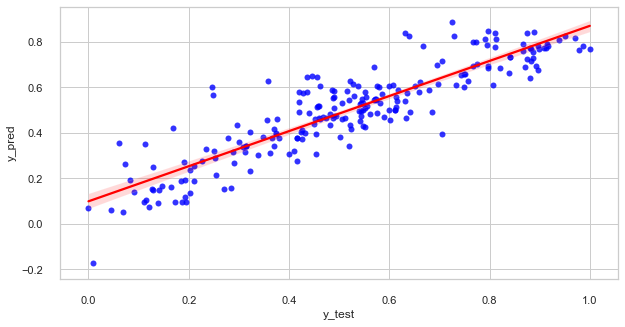

In [110]:
### Plotting y_boombikes_test_pred ~ y_boombikes_test

fig = plt.figure()
plt.figure(figsize=(10,5))
sns.regplot(y_boombikes_test,y_boombikes_test_pred,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=12)                          
plt.ylabel('y_pred', fontsize=12)                          

In [111]:
y_boombikes_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [112]:
X_boombikes_train_RFE.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_light snow',
       'weathersit_mist', 'season_spring', 'season_summer', 'season_winter',
       'mnth_sept'],
      dtype='object')

### The final equation of our best fitted line using 10 variables is:

cnt = 0.23 yr -0.09 holiday + 0.48 temp - 0.15 windspeed - 0.28 weathersit_light snow - 0.08 weathersit_mist - 0.05 season_spring + 0.06 season_summer + 0.09 season_winter + 0.09 mnth_sept


### Final Result Comparison between Train model and Test:
- Train R-squared : 0.833
- Train Adjusted R-squared : 0.829
- Test R-squared: 0.793
- Test Adjusted R-squared: 0.77
- Difference in R-squared between train and test: 0.04
- Difference in adjusted R-squared between Train and test: 0.05


## Interpretation

 - From the equation for best fitted line, We can see that temperature variable is having the highest coefficient 0.48, which means if the temperature increases by one unit the number of bike rentals increases by 0.48 units if all the other variables are kept constant.

- We also see there are some variables like holiday, windspeed, weathersit_light snow, weathersit_mist and season_spring with negative coefficients, which suggests that as these independent variable increases, the dependent variable i.e. the cnt tends to decrease. 


- From the equation for best fitted line, We can see that weathersit_light snow variable is having the highest negative coefficient of -0.28, which means if the weathersit_light snow increases by one unit the number of bike rentals decreases by 0.28 units  if all the other variables are kept constant.


- From the equation we could say that when there is one unit change in season_winter (i.e when winter season starts - value of season_winter changes from 0 to 1) count increase by 0.09.


- Similarly for the season_summer we could say that when there is one unit change in season_summer (i.e when summer season starts - value of season_summer changes from 0 to 1) count increase by 0.06.


- Also, for the mnth_sept we could say that when there is one unit change in mnth_sept (i.e when september month starts - value of mnth_sept changes from 0 to 1) count increase by 0.09.


## Bussiness Recomendations

- We can see that Boombikes is getting famous day by day as the demand increased in 2019 compared to 2018. Boombikes might be facing financial loss during the pandemic but once everything resumes, the demand may again spike up.


- There is a positive correlation between temp & cnt and negative correlation between windspeed & cnt and hum & cnt. We could say that places with higher temperature and having low windspeed and low humidity can be targeted for increased demand.


- When there is season change to winter or to summer, we could see a rise in the demand of rental boombikes. The company could invest more and have higher number of available bikes during this time. 
        

- To increase Boombikes revenue after the pandemic, they could focus more on Summer & Winter season,  September month, Weekends, atmospheric parameters like temperature and windspeed as they have good influence on bike rentals.


- Regarding the weathersit variable, we have got negative coefficients for Light Snow + Light Rain  and Mist + Cloudy. Seeing this pattern they could rollout some offers like offering free raincoat/umbrella to ease the customers.


- Similar offers can be provided for other variables which are having negative coefficients and negatively correlated to bike rentals to lure more customers, hence increasing the revenue of BoomBikes.